# KNN (K Nearest Neighbors)

Nos han dado un conjunto de datos clasificados, de una empresa!  Para guardar la anonimidad, los nombres de las columnas se han alterado, pero sí nos han dado los datos y cuál es la columna meta (a predecir)

Utilizaremos el KNN para crear un modelo que directamente predice una clase para una nueva observación, basada en sus características (columnas).

## Importar Librerías

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtener los datos

Especificar que la columna cero (0) servirá de índice (index_col = 0)

In [23]:
datos = pd.read_csv("./datos/Datos_Clasificados.csv", index_col = 0)

In [24]:
datos.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,CLASE
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Estandarizar las Variables

Como el clasificador KNN predice la clase de una observación de prueba por medio de la identificación de las observaciones que están más cercanas a ella, la escala de las variables es importante.  Cualesquiera variables que estén a una escala mayor tendrán un efecto mucho más grande sobre la distancia entre las observaciones, y por ende sobre el clasificador KNN, que las variables que estén a una menor escala.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
escalador = StandardScaler()

In [27]:
escalador.fit(datos.drop('CLASE', axis = 1))

StandardScaler()

In [28]:
cols_std = escalador.transform(datos.drop('CLASE', axis = 1))

In [29]:
datos_std = pd.DataFrame(cols_std, columns = datos.columns[:-1])
datos_std.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [43]:
cols_std

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(cols_std, datos['CLASE'],
                                                    test_size = 0.30, random_state = 0)

## Utilización del KNN

Debemos recordar que estamos tratando de encontrar un modelo que prediga si una observación cae en una CLASE o no.  Empezaremos con un valor k = 1.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [34]:
knn.fit(X_entreno, y_entreno)

KNeighborsClassifier(n_neighbors=1)

In [35]:
pred = knn.predict(X_prueba)

## Predicciones y Evaluaciones

Evaluemos nuestro modelo KNN!

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(confusion_matrix(y_prueba, pred))

[[125  15]
 [ 16 144]]


In [38]:
print(classification_report(y_prueba, pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## Selección de un valor K

Utilizaremos el método del codo (elbow method) para seleccionar un buen valor para K:

In [39]:
tasa_error = []

# Puede tardar un poco
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_entreno, y_entreno)
    pred_i = knn.predict(X_prueba)
    tasa_error.append(np.mean(pred_i != y_prueba))

Text(0, 0.5, 'Tasa de Error')

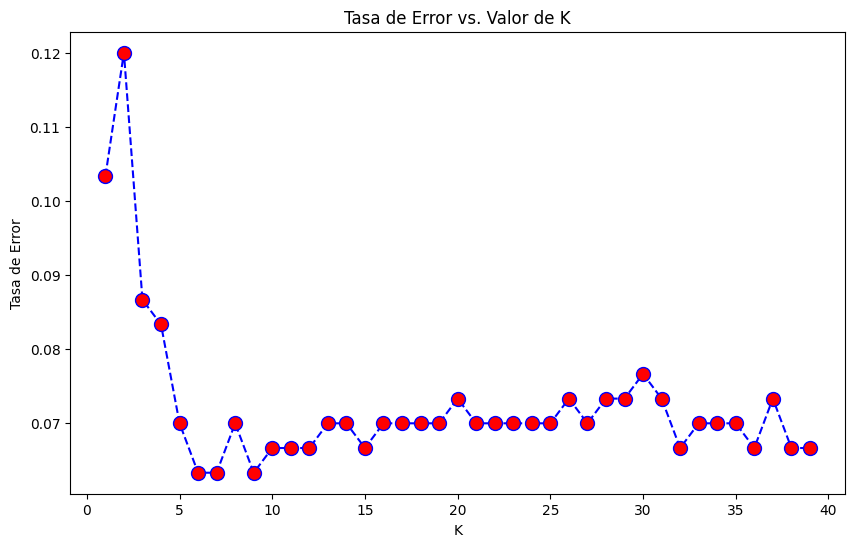

In [40]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

Podemos ver que despues de aproximadamente K > 5 la taza de error se mantiene entre 0.06 y 0.08.  Volvamos a entrenar al modelo con ese valor y revisemos el reporte de clasificación!

In [41]:
# PRIMERO UNA RAPIDA COMPARACION CON NUESTRO VALOR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_entreno,y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 1')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 1

Matriz de Confusión

[[125  15]
 [ 16 144]]


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [42]:
# AHORA CON K = 5
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_entreno, y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 5')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 5

Matriz de Confusión

[[128  12]
 [  9 151]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       140
           1       0.93      0.94      0.93       160

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# BIEN!

Logramos sacarle un mejor rendimiento a nuestro modelo al afinarlo con un mejor valor para K!